# **Importing the Dependencies**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# **Data Collection**

In [93]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

# **Data Processing**

In [94]:
# first 10 rows in the dataframe
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [95]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [96]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Data Cleaning / Preprocessing**

In [97]:
# check the number of missing values in each column
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [98]:
customer_data = customer_data.drop(columns=['CustomerID'], errors='ignore')


Choosing the Annual Income Column & Spending Score Column

In [99]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares




In [100]:
# finding wcss value for different number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# **Data Analysis**

In [101]:
customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Visualization

In [102]:
age_groups = pd.cut(customer_data['Age'],
bins = [18, 25, 35, 45, 55, 100],
labels = ['18-25', '26-35', '36-45', '46-55', '55+'])

In [103]:
age_group_count = age_groups.value_counts().sort_index()
age_group_count


,count
Age,
18-25,34
26-35,60
36-45,36
46-55,37
55+,29


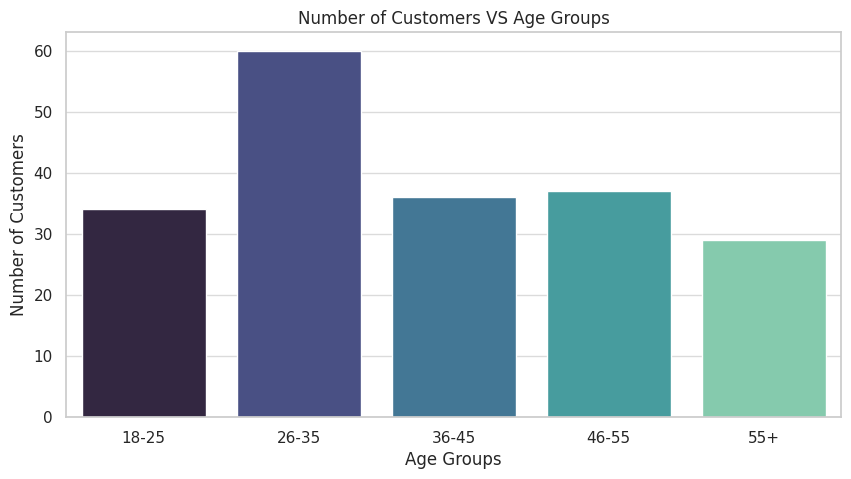

In [104]:
age_df = pd.DataFrame({'Age_Groups': age_group_count.index,
                       'Number_of_Customers': age_group_count.values})
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Groups', y='Number_of_Customers', data=age_df,hue='Age_Groups', palette='mako' , legend=False)
plt.title("Number of Customers VS Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.grid(axis='y',alpha=0.7)
plt.show()

In [105]:
gender_count = customer_data['Gender'].value_counts()
gender_count


,count
Gender,
Female,112
Male,88


<function matplotlib.pyplot.show(close=None, block=None)>

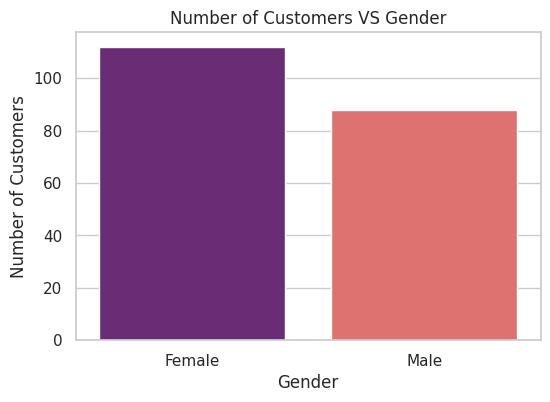

In [106]:
gender_df = pd.DataFrame({'Gender': gender_count.index,'Number_of_Customers': gender_count.values})
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
bars = sns.barplot(x='Gender', y='Number_of_Customers', data=gender_df,hue='Gender',palette='magma',dodge=False)
plt.title("Number of Customers VS Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show


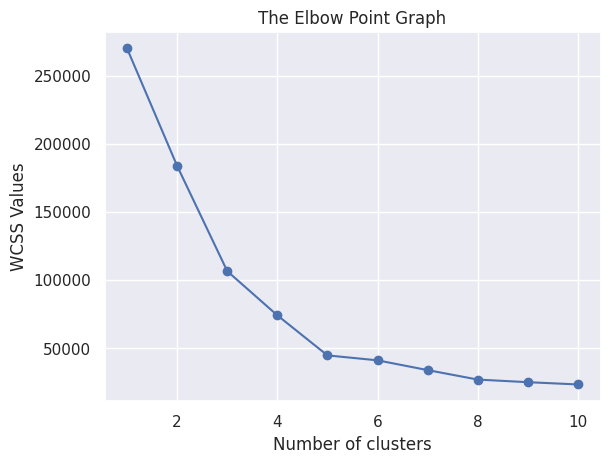

In [107]:
# plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss,marker = 'o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Values')
plt.show()

Optimal Number of Clusters = 5

# Training the K-Means Clustering Model

In [108]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## 5 Clusters - 0, 1, 2, 3, 4

## Visualizing all the Clusters

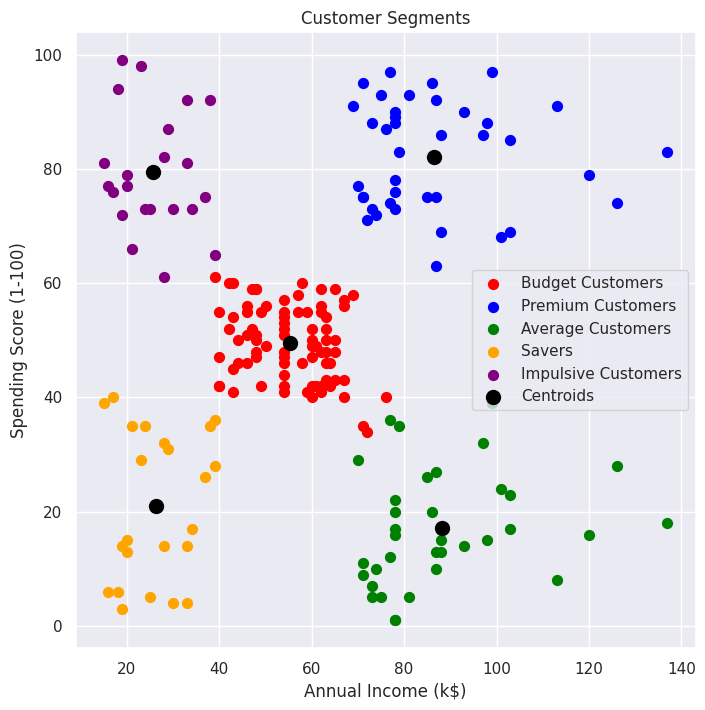

In [109]:
plt.figure(figsize=(8,8))

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='red', label='Budget Customers')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='blue', label='Premium Customers')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='green', label='Average Customers')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='orange', label='Savers')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='purple', label='Impulsive Customers')

# Plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=100, c='black', marker='o', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
